In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# работа с таблицей

## чтение таблицы

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '~/class_2_1/TRB_10_7/TRB_10_7.tsv'
df = pd.read_csv(file_path, sep='\t')
df

,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2
0,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
1,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
2,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
3,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5
4,TGTGCCAGCAGCGTAGCAGGGGCGGGGAGTAGCTCCTACGAGCAGT...,CASSVAGAGSSSYEQYF,TRBV9,TRBJ2-7
...,...,...,...,...
9999994,TGTGCCAGCAGTTACTCGACCCGCCCGGTGCGGACCGGGGAGCTGT...,CASSYSTRPVRTGELFF,TRBV6-5,TRBJ2-2
9999995,TGTGCCCCGGAGGGGGAGAGGGGGGGGTCCTACGAGCAGTACTTC,CAPEGERGGSYEQYF,TRBV24-1,TRBJ2-7
9999996,TGTGCCAGCAGCCAAGACCCGGGACAGGGTTCGGCTTTCTTT,CASSQDPGQGSAFF,TRBV3-1,TRBJ1-1
9999997,TGCAGTGCTAGAGATCGCCGGGACAGGGGGAACACTGAAGCTTTCTTT,CSARDRRDRGNTEAFF,TRBV20-1,TRBJ1-1


## график

Text(0, 0.5, 'counts')

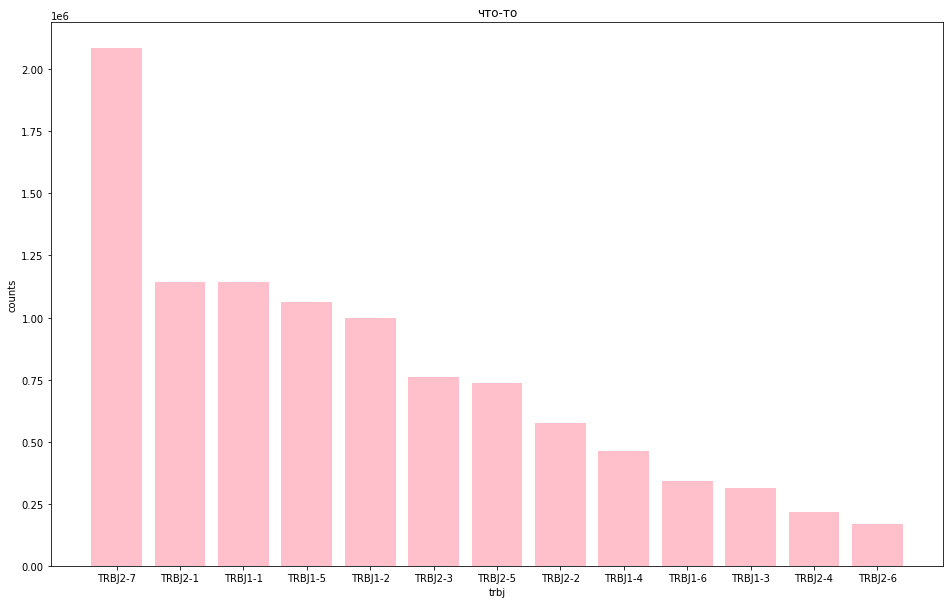

In [24]:
plt.figure(figsize=(16, 10))
trbj_counts = df['TRBJ1-2'].value_counts()
plt.bar(trbj_counts.index, trbj_counts.values, color='pink')
plt.title ('что-то')
plt.xlabel('trbj')
plt.ylabel('counts')

# вставка изображения

In [6]:
pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import IPython
print(IPython.__version__)

7.29.0


In [8]:
from IPython.display import Image

Image(url='https://images.app.goo.gl/2bHXLLBeggJCMUHg9')

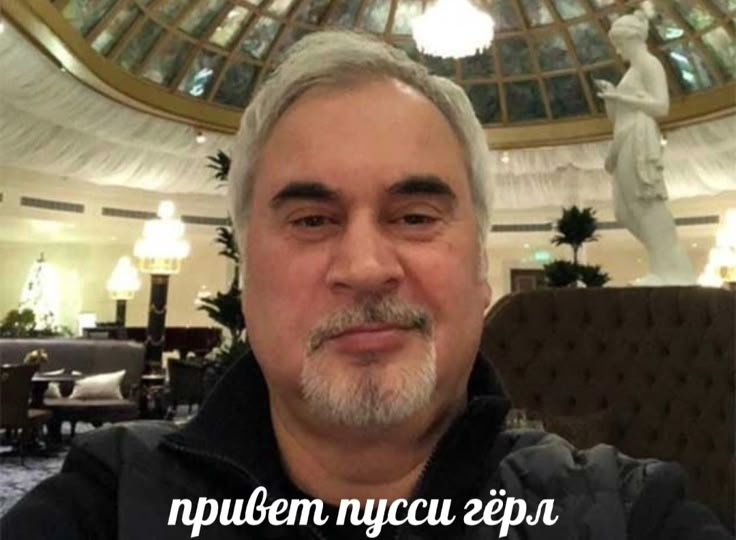

In [9]:
from IPython.display import Image

Image(filename='meladje.jpg')

# работа с R

In [10]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
%load_ext rpy2.ipython

In [12]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [13]:
%%R
install.packages("ggplot2")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  6


* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/ikulikova/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/octet-stream' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/Rtmp1duSpO/downloaded_packages’


преобразуем датасет в R объект

In [16]:
trbj_counts_df = pd.DataFrame(trbj_counts)

In [17]:
trbj_counts_df = trbj_counts.reset_index()
trbj_counts_df.columns = ['trbj', 'count']

In [18]:
trbj_counts_r = pandas2ri.py2rpy(trbj_counts_df)
%R -i trbj_counts_r

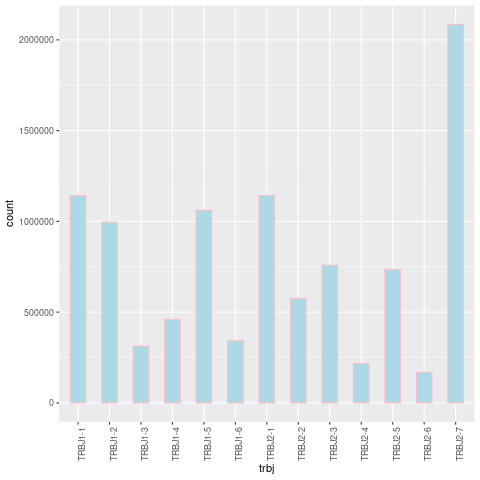

In [23]:
%%R

library(ggplot2)

ggplot(data = trbj_counts_r, mapping = aes(x = trbj, y = count)) +
  geom_bar(stat = "identity", width = 0.5, color = "pink", fill = "lightblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))